In [279]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import  make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
df=pd.read_csv("ASD.csv")

In [280]:
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,1,0,0,1,1,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,2,1,1,0,1,0,0,0,1,0,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,3,1,1,0,1,1,0,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,4,1,1,0,1,0,0,1,1,0,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,5,1,0,0,0,0,0,0,1,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO


In [281]:
df.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               704 non-null    int64 
 1   A1_Score         704 non-null    int64 
 2   A2_Score         704 non-null    int64 
 3   A3_Score         704 non-null    int64 
 4   A4_Score         704 non-null    int64 
 5   A5_Score         704 non-null    int64 
 6   A6_Score         704 non-null    int64 
 7   A7_Score         704 non-null    int64 
 8   A8_Score         704 non-null    int64 
 9   A9_Score         704 non-null    int64 
 10  A10_Score        704 non-null    int64 
 11  age              704 non-null    object
 12  gender           704 non-null    object
 13  ethnicity        704 non-null    object
 14  jundice          704 non-null    object
 15  austim           704 non-null    object
 16  contry_of_res    704 non-null    object
 17  used_app_before  704 non-null    ob

In [283]:
df.isnull().sum()

id                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64

In [284]:
df["ethnicity"] = df["ethnicity"].replace("?", "No_Ethinicy")

In [285]:
df["ethnicity"].value_counts()

White-European     233
Asian              123
No_Ethinicy         95
Middle Eastern      92
Black               43
South Asian         36
Others              30
Latino              20
Hispanic            13
Pasifika            12
Turkish              6
others               1
Name: ethnicity, dtype: int64

In [286]:
df["age"] = df["age"].replace("?", "55")

In [287]:
df["A1_Score"].value_counts()

1    508
0    196
Name: A1_Score, dtype: int64

In [288]:
df["A2_Score"].value_counts()

0    385
1    319
Name: A2_Score, dtype: int64

In [289]:
df["A3_Score"].value_counts()

0    382
1    322
Name: A3_Score, dtype: int64

In [290]:
df["A4_Score"].value_counts()

0    355
1    349
Name: A4_Score, dtype: int64

In [291]:
df["A5_Score"].value_counts()

0    353
1    351
Name: A5_Score, dtype: int64

In [292]:
df["A6_Score"].value_counts()

0    504
1    200
Name: A6_Score, dtype: int64

In [293]:
df["A7_Score"].value_counts()

0    410
1    294
Name: A7_Score, dtype: int64

In [294]:
df["A8
   
   _Score"].value_counts()

SyntaxError: EOL while scanning string literal (3141580971.py, line 1)

In [295]:
df["A9_Score"].value_counts()

0    476
1    228
Name: A9_Score, dtype: int64

In [296]:
df["A10_Score"].value_counts()

1    404
0    300
Name: A10_Score, dtype: int64

In [297]:
df["gender"].value_counts()

m    367
f    337
Name: gender, dtype: int64

In [298]:
df["jundice"].value_counts()

no     635
yes     69
Name: jundice, dtype: int64

In [299]:
df["austim"].value_counts()

no     613
yes     91
Name: austim, dtype: int64

In [300]:
df["used_app_before"].value_counts()

no     692
yes     12
Name: used_app_before, dtype: int64

In [301]:
df["result"].value_counts()

4     131
3     110
5      83
2      74
6      70
7      57
8      55
9      47
1      33
10     30
0      14
Name: result, dtype: int64

In [302]:
df["Class/ASD"].value_counts()

NO     515
YES    189
Name: Class/ASD, dtype: int64

In [303]:
df=df.drop(['id'], axis=1)
df=df.drop(['used_app_before'], axis=1)
df=df.drop(['result'], axis=1)
df=df.drop(['age_desc'], axis=1)
df=df.drop(['relation'], axis=1)

In [304]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,United States,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,United States,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,No_Ethinicy,no,no,Egypt,NO


In [305]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["gender"] = le.fit_transform(df["gender"])
df["gender"].value_counts()

1    367
0    337
Name: gender, dtype: int64

In [306]:
print(le.inverse_transform([0]))
print(le.inverse_transform([1]))

['f']
['m']


In [307]:
df["ethnicity"] = le.fit_transform(df["ethnicity"])
df["ethnicity"].value_counts()

10    233
0     123
5      95
4      92
1      43
8      36
6      30
3      20
2      13
7      12
9       6
11      1
Name: ethnicity, dtype: int64

In [308]:
print(le.inverse_transform([0]))
print(le.inverse_transform([1]))
print(le.inverse_transform([2]))
print(le.inverse_transform([3]))
print(le.inverse_transform([4]))
print(le.inverse_transform([5]))
print(le.inverse_transform([6]))
print(le.inverse_transform([7]))
print(le.inverse_transform([8]))
print(le.inverse_transform([9]))
print(le.inverse_transform([10]))
print(le.inverse_transform([11]))

['Asian']
['Black']
['Hispanic']
['Latino']
['Middle Eastern ']
['No_Ethinicy']
['Others']
['Pasifika']
['South Asian']
['Turkish']
['White-European']
['others']


In [309]:
df["jundice"] = le.fit_transform(df["jundice"])
df["jundice"].value_counts()

0    635
1     69
Name: jundice, dtype: int64

In [310]:
print(le.inverse_transform([0]))
print(le.inverse_transform([1]))

['no']
['yes']


In [311]:
df["austim"] = le.fit_transform(df["austim"])
df["austim"].value_counts()

0    613
1     91
Name: austim, dtype: int64

In [312]:
print(le.inverse_transform([0]))
print(le.inverse_transform([1]))

['no']
['yes']


In [313]:
df["contry_of_res"] = le.fit_transform(df["contry_of_res"])
df["contry_of_res"].value_counts()

64    113
62     82
43     81
29     81
63     77
     ... 
17      1
16      1
38      1
14      1
19      1
Name: contry_of_res, Length: 67, dtype: int64

In [314]:
for i in range(64):
    print(le.inverse_transform([i]))

['Afghanistan']
['AmericanSamoa']
['Angola']
['Argentina']
['Armenia']
['Aruba']
['Australia']
['Austria']
['Azerbaijan']
['Bahamas']
['Bangladesh']
['Belgium']
['Bolivia']
['Brazil']
['Burundi']
['Canada']
['Chile']
['China']
['Costa Rica']
['Cyprus']
['Czech Republic']
['Ecuador']
['Egypt']
['Ethiopia']
['Finland']
['France']
['Germany']
['Hong Kong']
['Iceland']
['India']
['Indonesia']
['Iran']
['Iraq']
['Ireland']
['Italy']
['Japan']
['Jordan']
['Kazakhstan']
['Lebanon']
['Malaysia']
['Mexico']
['Nepal']
['Netherlands']
['New Zealand']
['Nicaragua']
['Niger']
['Oman']
['Pakistan']
['Philippines']
['Portugal']
['Romania']
['Russia']
['Saudi Arabia']
['Serbia']
['Sierra Leone']
['South Africa']
['Spain']
['Sri Lanka']
['Sweden']
['Tonga']
['Turkey']
['Ukraine']
['United Arab Emirates']
['United Kingdom']


In [315]:
df["Class/ASD"] = le.fit_transform(df["Class/ASD"])
df["Class/ASD"].value_counts()

0    515
1    189
Name: Class/ASD, dtype: int64

In [316]:
print(le.inverse_transform([0]))
print(le.inverse_transform([1]))

['NO']
['YES']


In [317]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,austim,contry_of_res,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,0,10,0,0,64,0
1,1,1,0,1,0,0,0,1,0,1,24,1,3,0,1,13,0
2,1,1,0,1,1,0,1,1,1,1,27,1,3,1,1,56,1
3,1,1,0,1,0,0,1,1,0,1,35,0,10,0,1,64,0
4,1,0,0,0,0,0,0,1,0,0,40,0,5,0,0,22,0


In [318]:
from sklearn.datasets import  make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [319]:
df["age"] = df["age"].replace("?", "55")

In [320]:
x=df.drop(["Class/ASD"],axis=1)
y=df["Class/ASD"]
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         1         1         1         0         0         1   
1           1         1         0         1         0         0         0   
2           1         1         0         1         1         0         1   
3           1         1         0         1         0         0         1   
4           1         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
699         0         1         0         1         1         0         1   
700         1         0         0         0         0         0         0   
701         1         0         1         1         1         0         1   
702         1         0         0         1         1         0         1   
703         1         0         1         1         1         0         1   

     A8_Score  A9_Score  A10_Score age  gender  ethnicity  jundice  austim 

In [321]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
699    1
700    0
701    1
702    0
703    1
Name: Class/ASD, Length: 704, dtype: int32


In [322]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [337]:
modelLR=LogisticRegression()
modelLR.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [330]:
y_predLR = model.predict(x_test)
accuracy = accuracy_score(y_test, y_predLR)
print("Accuracy:", accuracy)

Accuracy: 0.7872340425531915


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [331]:
confusion_matrix(y_test,y_predLR)

array([[103,   2],
       [ 28,   8]], dtype=int64)

In [345]:
from sklearn.svm import SVC
modelSVC=SVC()
modelSVC.fit(x_train,y_train)
y_pred_SVM=classifier.predict(x_test)

In [346]:
accuracy = accuracy_score(y_test, y_pred_SVM)
print("Accuracy:", accuracy)

Accuracy: 0.7446808510638298


In [347]:
confusion_matrix(y_test,y_pred_SVM)

array([[105,   0],
       [ 36,   0]], dtype=int64)

In [349]:
from sklearn.naive_bayes import GaussianNB
modelGAUS = GaussianNB()
modelGAUS.fit(x_train, y_train)
y_predGAUS = model.predict(x_test)
accuracy = accuracy_score(y_test, y_predGAUS)
print("Accuracy:", accuracy)

Accuracy: 0.9858156028368794


In [336]:
confusion_matrix(y_test,y_predGAUS)

array([[104,   1],
       [  1,  35]], dtype=int64)

In [353]:
from sklearn.neighbors import KNeighborsClassifier
modelKNN = KNeighborsClassifier(n_neighbors=10)
modelKNN.fit(x_train, y_train)
y_predKNN = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8581560283687943


In [273]:
confusion_matrix(y_test,y_predKNN)

array([[103,   2],
       [ 28,   8]], dtype=int64)

In [327]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [328]:
y_predDTC = clf.predict(x_test)
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8581560283687943


In [275]:
confusion_matrix(y_test,y_predDTC)

array([[89, 16],
       [ 4, 32]], dtype=int64)

In [342]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, validation_scores = learning_curve(
    modelLR, x, y, train_sizes=train_sizes, cv=5, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [343]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)

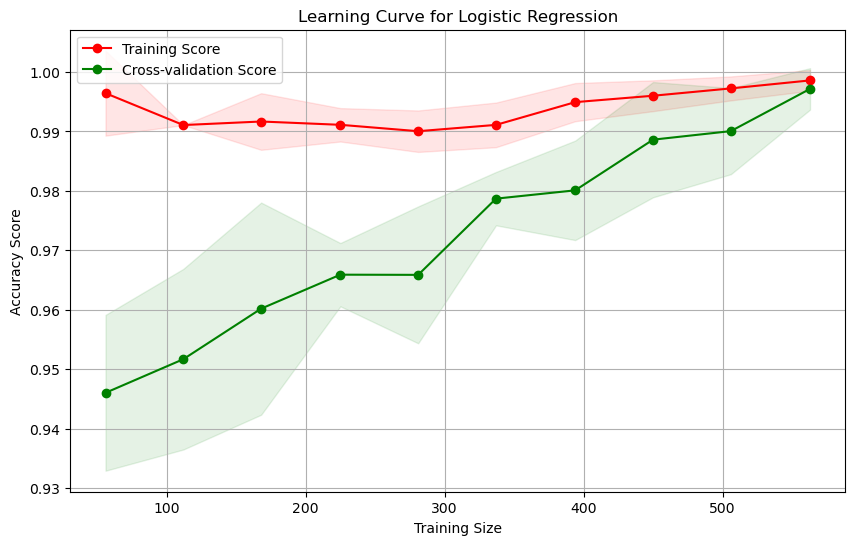

In [344]:
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

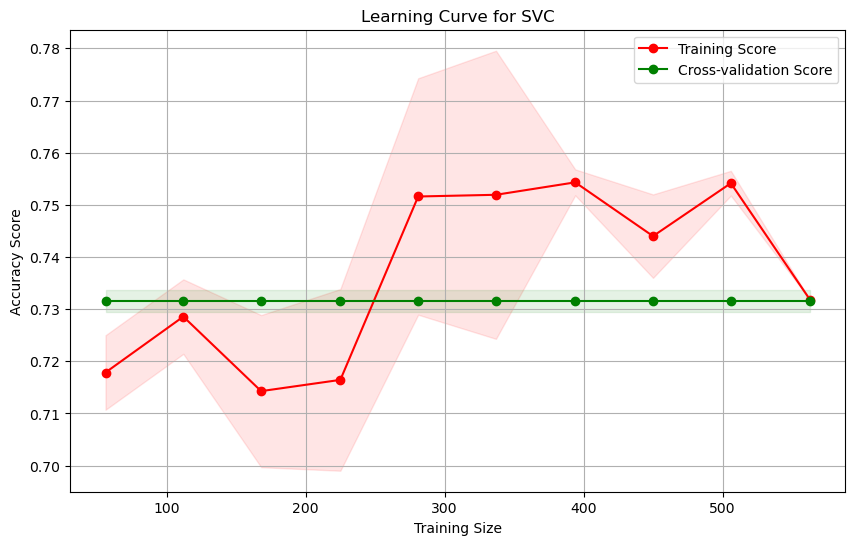

In [348]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, validation_scores = learning_curve(
    modelSVC, x, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for SVC")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.legend(loc="best")
plt.show()


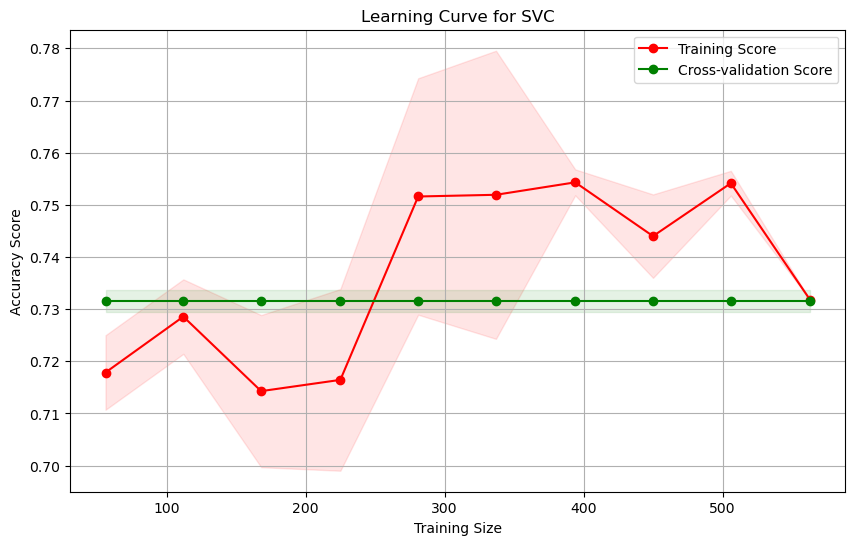

In [357]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, validation_scores = learning_curve(
    modelSVC, x, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for SVC")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

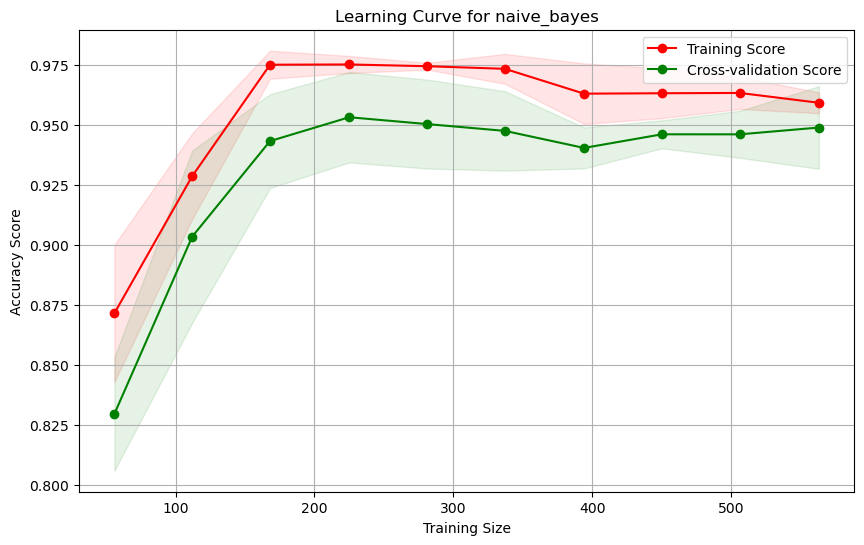

In [351]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, validation_scores = learning_curve(
    modelGAUS, x, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for naive_bayes")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

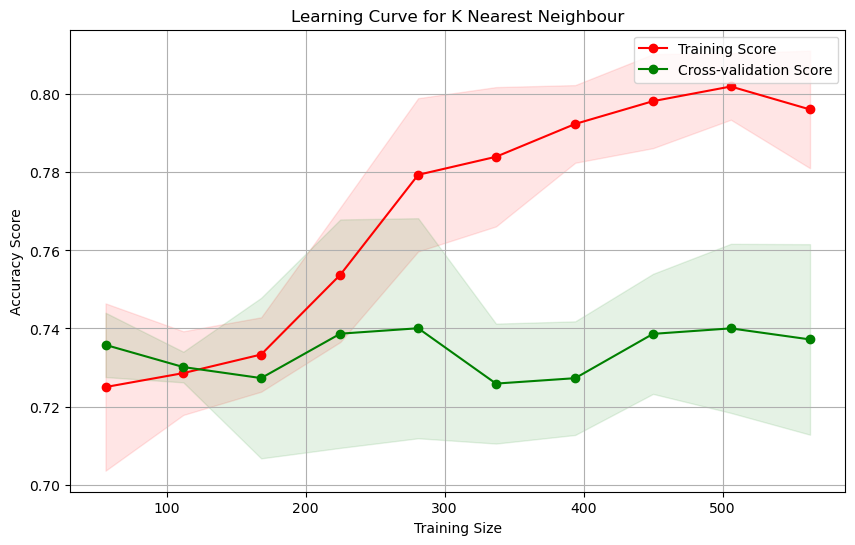

In [354]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, validation_scores = learning_curve(
    modelKNN, x, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for K Nearest Neighbour")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.legend(loc="best")
plt.show()

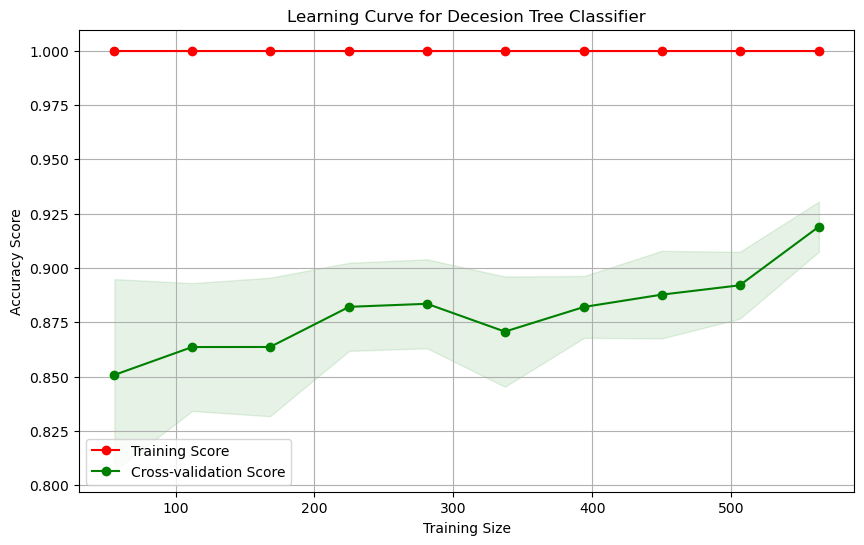

In [355]:
from sklearn.model_selection import learning_curve
train_sizes = np.linspace(0.1, 1.0, 10)
train_sizes, train_scores, validation_scores = learning_curve(
    clf, x, y, train_sizes=train_sizes, cv=5, scoring='accuracy')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
validation_scores_mean = np.mean(validation_scores, axis=1)
validation_scores_std = np.std(validation_scores, axis=1)
plt.figure(figsize=(10, 6))
plt.title("Learning Curve for Decesion Tree Classifier")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training Score")
plt.plot(train_sizes, validation_scores_mean, 'o-', color="g",
         label="Cross-validation Score")
plt.legend(loc="best")
plt.show()